In [1]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 🧹 2. Load and Preview Data
df = pd.read_csv(r"C:\Users\DELL\Downloads\job-analytics-project\job-analytics-backend\job_descriptions.csv")  # path to your uploaded file
df.columns = df.columns.str.strip()    # remove any trailing spaces
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [2]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop columns with too many missing values (optional threshold)
threshold = 0.6
df = df.loc[:, df.isnull().mean() < threshold]

# Fill or drop missing values
df['Role'] = df['Role'].fillna('Unknown')
df['Company'] = df['Company'].fillna('Unknown')
df.dropna(subset=['Job Description', 'skills'], inplace=True)

# Convert date
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')

# Create experience in numeric years (if possible)
df['Experience'] = df['Experience'].str.extract('(\d+)').astype(float)

In [3]:
print("\n🔹 Null Counts:")
print(df.isnull().sum().sort_values(ascending=False))


🔹 Null Counts:
Company Profile     5478
Experience             0
Job Id                 0
Salary Range           0
location               0
Country                0
Qualifications         0
latitude               0
longitude              0
Company Size           0
Work Type              0
Preference             0
Contact Person         0
Contact                0
Job Posting Date       0
Job Title              0
Role                   0
Job Description        0
Job Portal             0
Benefits               0
skills                 0
Responsibilities       0
Company                0
dtype: int64


In [4]:
# Summary stats
print("\n🔹 Summary Statistics (Numeric Columns):")
print(df.describe())


🔹 Summary Statistics (Numeric Columns):
             Job Id    Experience      latitude     longitude  Company Size  \
count  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06  1.615940e+06   
mean   1.548935e+15  2.501808e+00  1.937743e+01  1.639926e+01  7.370467e+04   
min    1.817948e+11  0.000000e+00 -4.090060e+01 -1.751982e+02  1.264600e+04   
25%    7.740508e+14  1.000000e+00  5.152100e+00 -1.531010e+01  4.311400e+04   
50%    1.547858e+15  3.000000e+00  1.807080e+01  1.914510e+01  7.363300e+04   
75%    2.323729e+15  4.000000e+00  3.907420e+01  4.757690e+01  1.043000e+05   
max    3.099618e+15  5.000000e+00  7.170690e+01  1.780650e+02  1.348340e+05   
std    8.946722e+14  1.707809e+00  2.355690e+01  7.066762e+01  3.529886e+04   

                    Job Posting Date  
count                        1615940  
mean   2022-09-15 02:07:38.874463744  
min              2021-09-15 00:00:00  
25%              2022-03-16 00:00:00  
50%              2022-09-15 00:00:00  
75%          

In [5]:
import nltk

# Download resources explicitly to your user directory
nltk.download('punkt', download_dir='C:\\Users\\DELL\\nltk_data')
nltk.download('stopwords', download_dir='C:\\Users\\DELL\\nltk_data')

# Point NLTK to that path
nltk.data.path.append('C:\\Users\\DELL\\nltk_data')

ModuleNotFoundError: No module named 'nltk'

In [78]:
import nltk
print(nltk.data.path)

['C:\\Users\\DELL/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', '/tmp/nltk_data', 'C:\\Users\\DELL\\nltk_data', 'C:\\Users\\DELL\\nltk_data']


import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def safe_clean_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return " ".join([word for word in tokens if word not in stop_words and len(word) > 2])
    except Exception as e:
        print(f"Error processing: {text} | {e}")
        return ""

company_profiles = df['Company Profile'].dropna()
company_profiles_cleaned = company_profiles.str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True)

company_profiles_final = company_profiles_cleaned.apply(safe_clean_text)

profile_df = pd.DataFrame({
    'Company': df.loc[company_profiles.index, 'Company'],
    'Company Profile': company_profiles_final
})

all_words = " ".join(profile_df['Company Profile']).split()
common_words = Counter(all_words).most_common(20)

plt.figure(figsize=(10, 5))
words, counts = zip(*common_words)
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title("Top Keywords in Company Profiles")
plt.tight_layout()
plt.show()
refer to other file

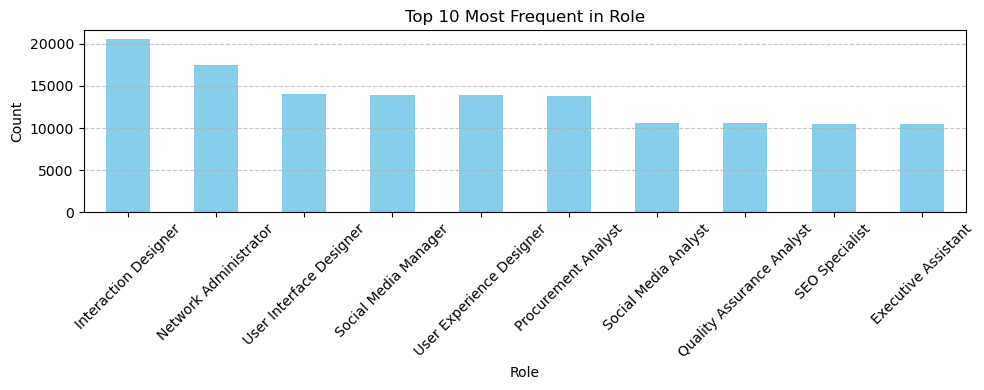

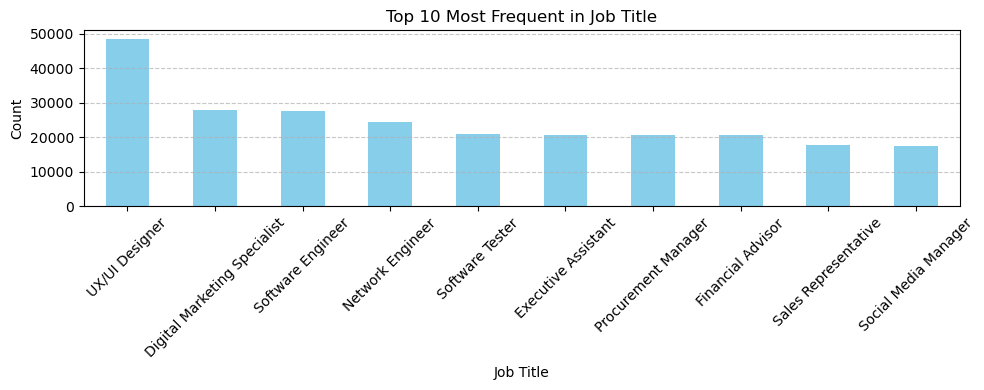

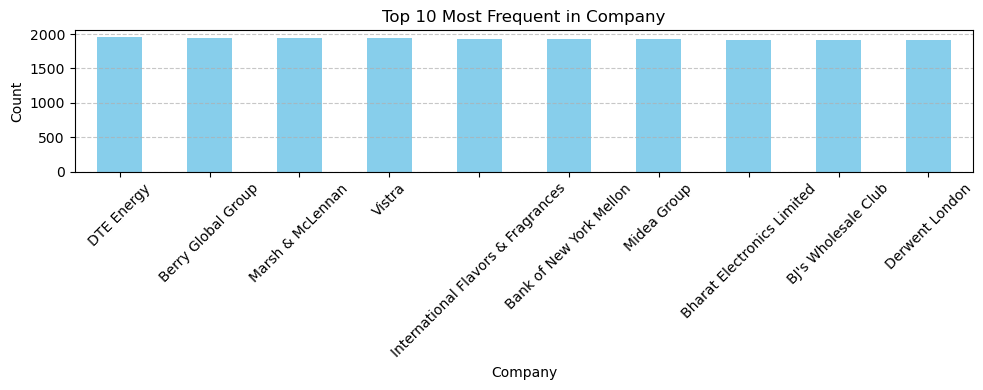

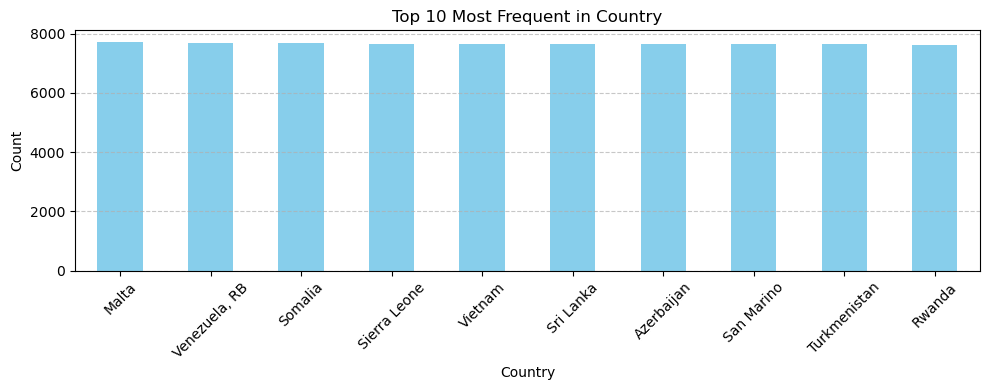

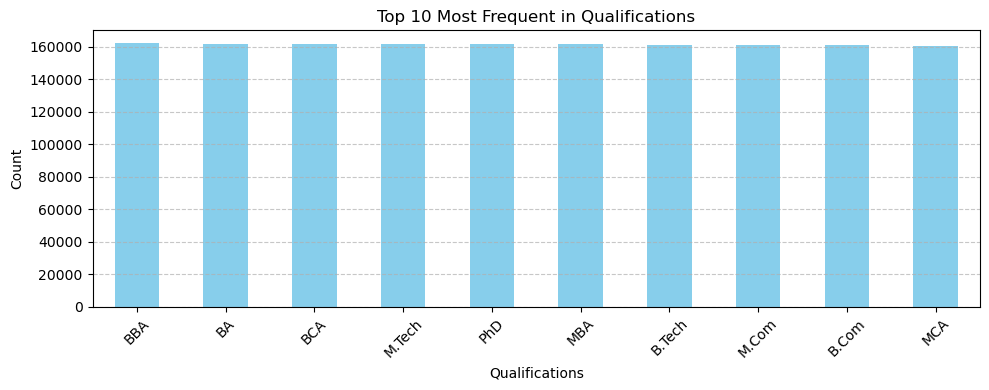

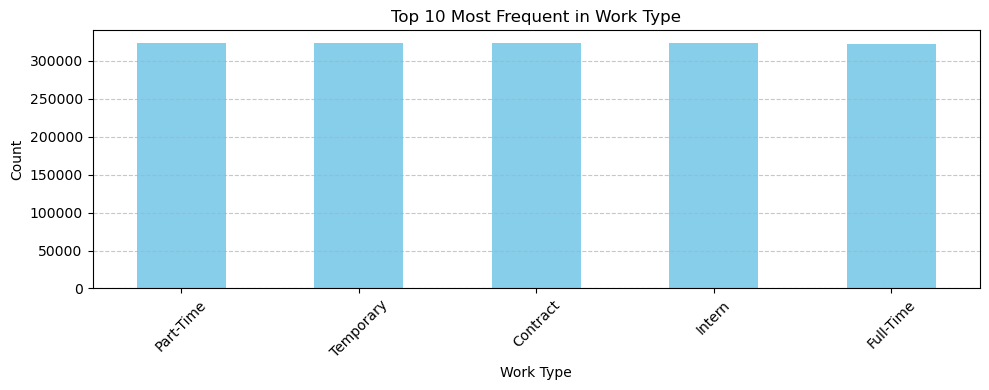

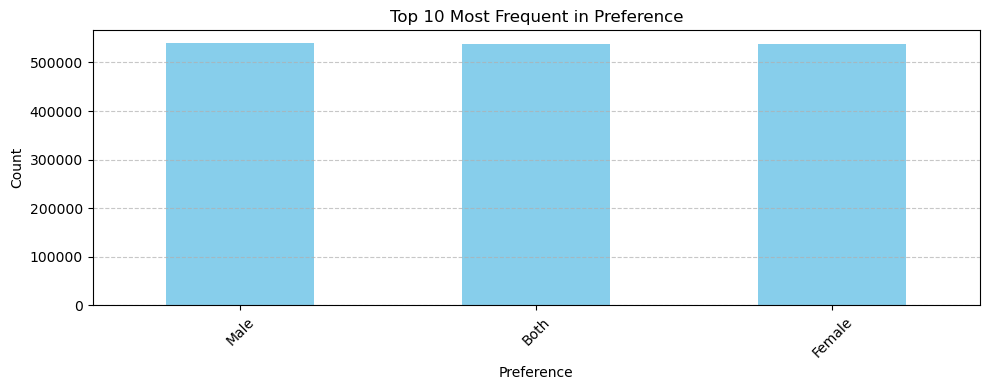

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_plot_top_categories(col, top_n=10):
    plt.figure(figsize=(10, 4))
    df[col].value_counts().nlargest(top_n).plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Most Frequent in {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualize selected categorical columns
for col in ['Role', 'Job Title', 'Company', 'Country', 'Qualifications', 'Work Type', 'Preference']:
    if col in df.columns:
        bar_plot_top_categories(col)

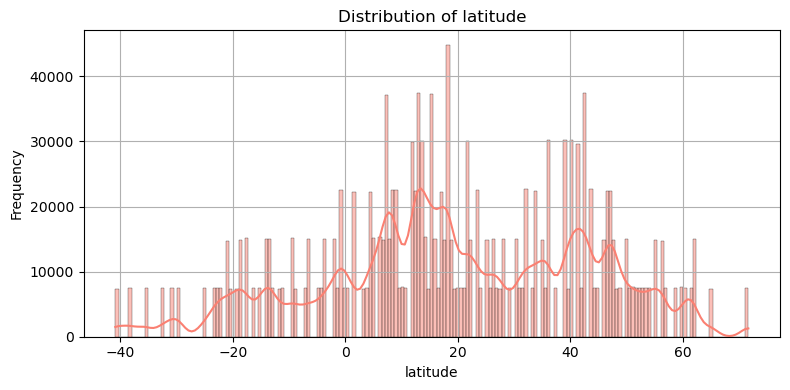

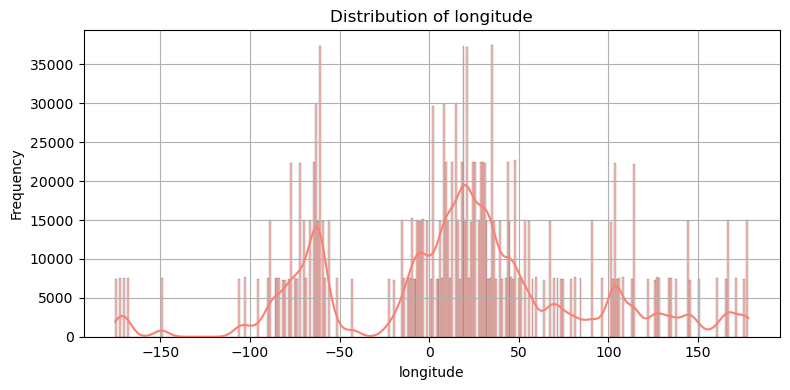

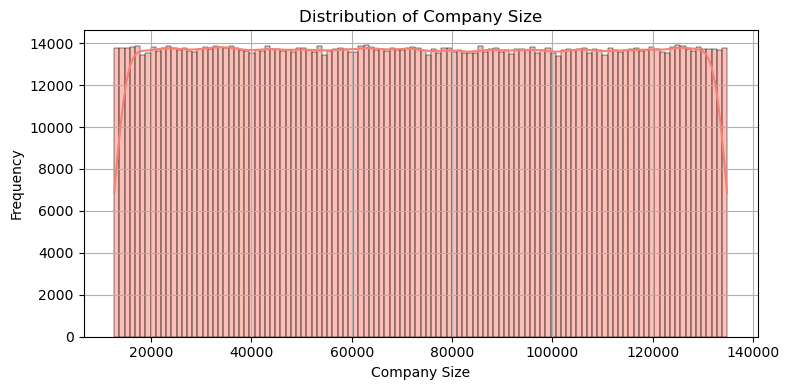

In [80]:
def histogram(col):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, color='salmon')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Columns that are numeric or can be converted
numeric_cols = ['latitude', 'longitude', 'Company Size']
for col in numeric_cols:
    if col in df.columns:
        histogram(col)

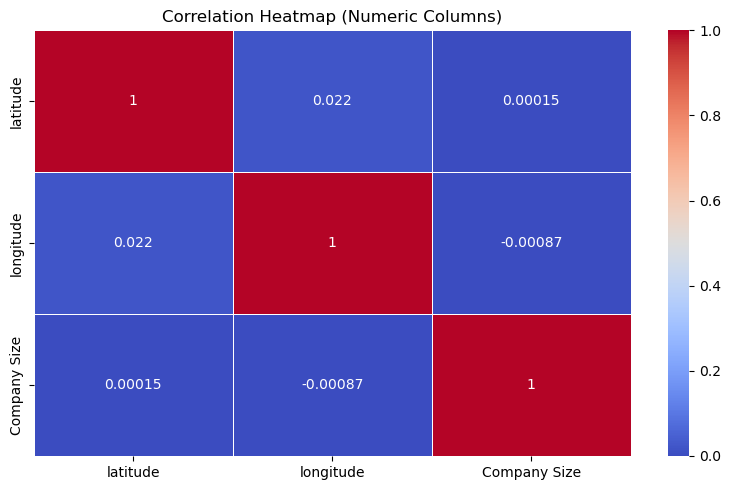

In [81]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.tight_layout()
plt.show()

1. Draw a chart for top 5 roles in 2023 and work type=’Intern’ and Job Title should be Account Director and company should be below 2M.

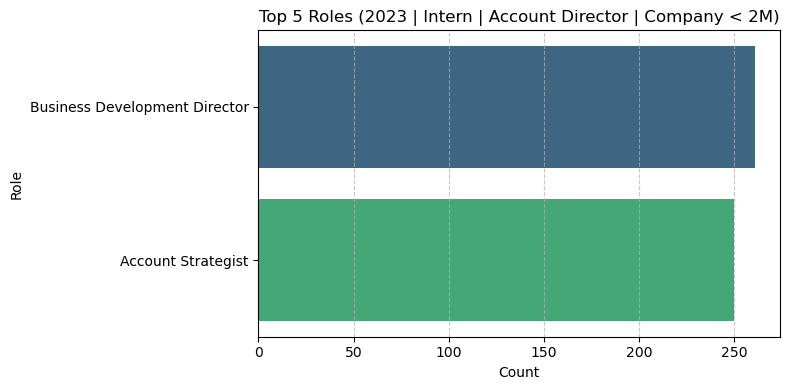

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🗂️ Load data
df = pd.read_csv(r"C:\Users\DELL\Downloads\job-analytics-project\job-analytics-backend\job_descriptions.csv")

# 🧹 Data Cleaning (ensure correct datetime format and numeric company size)
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce')
df['Company Size'] = pd.to_numeric(df['Company Size'], errors='coerce')

# 📅 Filter by Year = 2023
df_2023 = df[df['Job Posting Date'].dt.year == 2023]

# 🔍 Apply all conditions
filtered_df = df_2023[
    (df_2023['Work Type'].str.lower() == 'intern') &
    (df_2023['Job Title'].str.lower() == 'account director') &
    (df_2023['Company Size'] < 2_000_000)
]

# 📊 Count top 5 roles
top_roles = filtered_df['Role'].value_counts().nlargest(5)

# 📈 Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=top_roles.values, y=top_roles.index, palette='viridis')
plt.title("Top 5 Roles (2023 | Intern | Account Director | Company < 2M)")
plt.xlabel("Count")
plt.ylabel("Role")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

2. Draw a chart for top 10 companies who have max Data Engineer as Role and Data scientist as Job title and the country name should not have any Asian countries and preference should be female only .we should ignore the countries which starting with letter ‘C’ and latitude is below 10. The job posting date should be between 01/01/2023 to 06/01/2023. The qualification should be B.Tech and we should ignore other qualifications. This graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

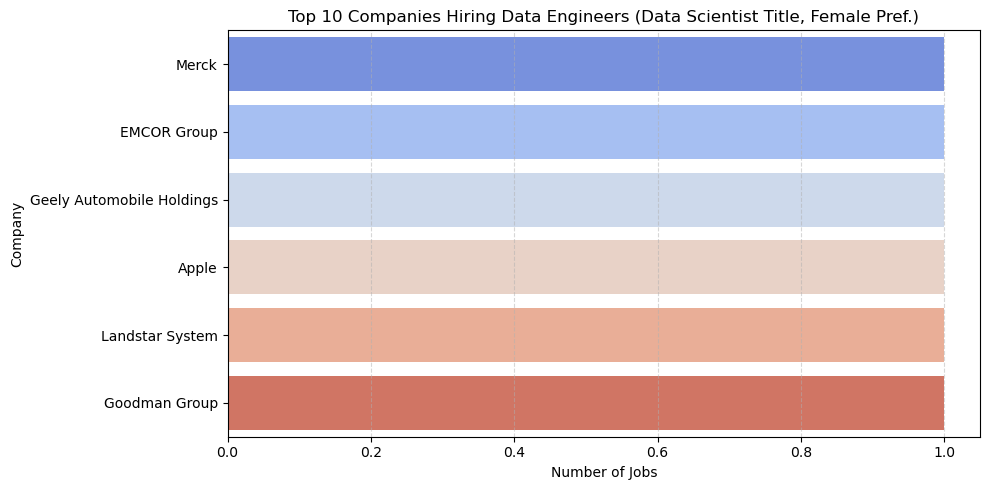

✅ Chart saved to: charts\top_10_data_engineer_companies.png


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz
import os

# Ensure date is parsed correctly
df['Job Posting Date'] = pd.to_datetime(df['Job Posting Date'], errors='coerce', dayfirst=True)

# Time control in IST
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
hour = current_time.hour

# Apply complex filter
mask = (
    (df['Role'].str.lower().str.strip() == 'data engineer') &
    (df['Job Title'].str.lower().str.strip() == 'data scientist') &
    (~df['Country'].str.lower().isin([
        'china', 'india', 'japan', 'pakistan', 'bangladesh', 'indonesia', 'thailand', 'nepal', 'sri lanka', 'malaysia'
    ])) &
    (~df['Country'].str.upper().str.startswith('C')) &
    (df['Preference'].str.lower().str.strip() == 'female') &
    (df['latitude'] < 10) &
    (df['Job Posting Date'] >= pd.Timestamp('2023-01-01')) &
    (df['Job Posting Date'] <= pd.Timestamp('2023-06-01')) &
    (df['Qualifications'].str.lower().str.contains('b.tech', na=False))
)

filtered_df = df[mask]

# Only show and save chart between 3 PM and 5 PM IST
if 15 <= hour < 17:
    top_companies = filtered_df['Company'].value_counts().nlargest(10)

    if top_companies.empty:
        print("No data available for the specified conditions.")
    else:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")
        plt.title("Top 10 Companies Hiring Data Engineers (Data Scientist Title, Female Pref.)")
        plt.xlabel("Number of Jobs")
        plt.ylabel("Company")
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.tight_layout()
        
        # Save the figure
        output_dir = "charts"
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, "top_10_data_engineer_companies.png")
        plt.savefig(output_path, dpi=300)

        plt.show()
        print(f"✅ Chart saved to: {output_path}")
else:
    print("⏳ This chart is only visible between 3 PM and 5 PM IST.")


3. Draw a chart between company size and company name where company size<50000 and job title should be mechanical engineer and experience should be more than 5 years and country should be Asian as well as salary should be more than $50k and the work type should be both part time and full time and ignore all other work types and the preference should be male .we should filter candidates those who are applied on idealist and this graph should work only between 3PM IST to 5 PM IST apart from that time we should not show this graph in dashboard itself.

In [84]:
import numpy as np
import pandas as pd

# Step 1: Force everything to string
df['Salary Range'] = df['Salary Range'].astype(str)

# Step 2: Define robust cleaning function
def clean_salary_range(salary):
    try:
        salary = salary.lower().replace('$', '').replace(',', '').replace('k', '000')
        # Now extract numeric values from ranges like '50000-70000'
        if '-' in salary:
            low, high = salary.split('-')
            return (float(low.strip()) + float(high.strip())) / 2
        else:
            return float(salary.strip())
    except:
        return np.nan

# Step 3: Apply to column
df['Salary Range Cleaned'] = df['Salary Range'].apply(clean_salary_range)

# Step 4: Confirm it's clean
df[['Salary Range', 'Salary Range Cleaned']].dropna().head(10)

,Salary Range,Salary Range Cleaned
0,$59K-$99K,79000.0
1,$56K-$116K,86000.0
2,$61K-$104K,82500.0
3,$65K-$91K,78000.0
4,$64K-$87K,75500.0
5,$59K-$93K,76000.0
6,$63K-$103K,83000.0
7,$65K-$102K,83500.0
8,$65K-$102K,83500.0
9,$60K-$80K,70000.0


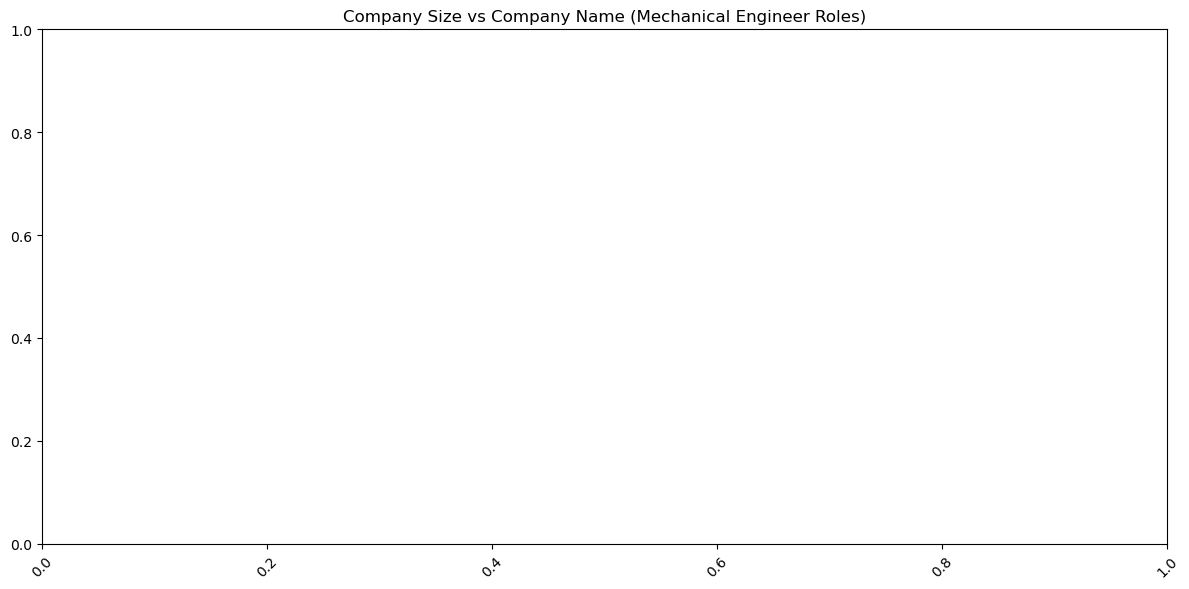

In [85]:
import pytz
from datetime import datetime

# Set IST timezone
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_hour = current_time.hour

# Proceed only between 3 PM and 5 PM IST
if 15 <= current_hour < 17:
    # ✅ Your cleaned data filtering logic (with fixes)
    df['Experience_Years'] = df['Experience'].astype(str).str.extract(r'(\d+)')[0].astype(float)

    asian_countries = ['India', 'China', 'Japan', 'Indonesia', 'Malaysia', 'Thailand', 'Vietnam', 'Pakistan', 'Bangladesh', 'Nepal', 'Sri Lanka', 'Philippines', 'Singapore', 'South Korea']

    filtered_df = df[
        (df['Company Size'] < 50000) &
        (df['Job Title'].str.lower() == 'mechanical engineer') &
        (df['Experience_Years'] > 5) &
        (df['Country'].isin(asian_countries)) &
        (df['Salary Range Cleaned'] > 50000) &
        (df['Work Type'].str.lower().isin(['part time', 'full time'])) &
        (df['Preference'].str.lower() == 'male') &
        (df['Job Portal'].str.lower() == 'idealist')
    ]

    # ✅ Plot chart: Company Size vs Company Name
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_df, x='Company', y='Company Size')
    plt.title('Company Size vs Company Name (Mechanical Engineer Roles)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("chart3_company_size_vs_name.png", dpi=300)
    plt.show()
else:
    print("⏰ Chart 3 is only available between 3 PM and 5 PM IST.")

In [86]:
# Shape and summary
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
df.describe(include='all').T

Shape: (1615940, 25)

Columns:
 ['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile', 'Salary Range Cleaned', 'Experience_Years']


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Job Id,1615940.0,NaN,NaN,NaN,1548935398924028.25,181794758338.0,774050846969771.0,1547857662803636.0,2323729361800797.0,3099618227279433.0,894672175243982.125
Experience,1615940,48,5 to 8 Years,34120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qualifications,1615940,10,BBA,162148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary Range,1615940,561,$59K-$88K,3043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,1615940,214,Seoul,15104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1615940,216,Malta,7723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1615940.0,NaN,NaN,NaN,19.377431,-40.9006,5.1521,18.0708,39.0742,71.7069,23.556904
longitude,1615940.0,NaN,NaN,NaN,16.399259,-175.1982,-15.3101,19.1451,47.5769,178.065,70.667622
Work Type,1615940,5,Part-Time,324044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company Size,1615940.0,NaN,NaN,NaN,73704.671546,12646.0,43114.0,73633.0,104300.0,134834.0,35298.863912


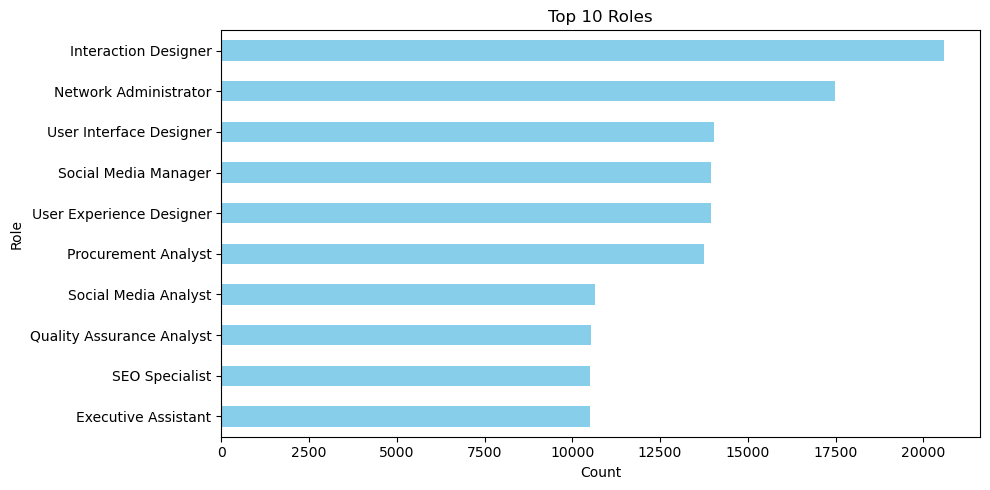

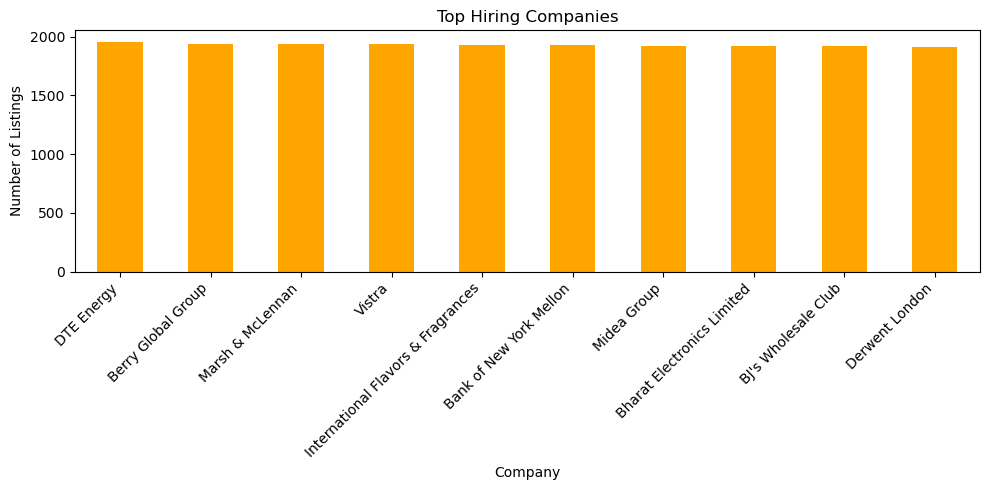

In [87]:
plt.figure(figsize=(10, 5))
df['Role'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Roles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df['Company'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top Hiring Companies')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

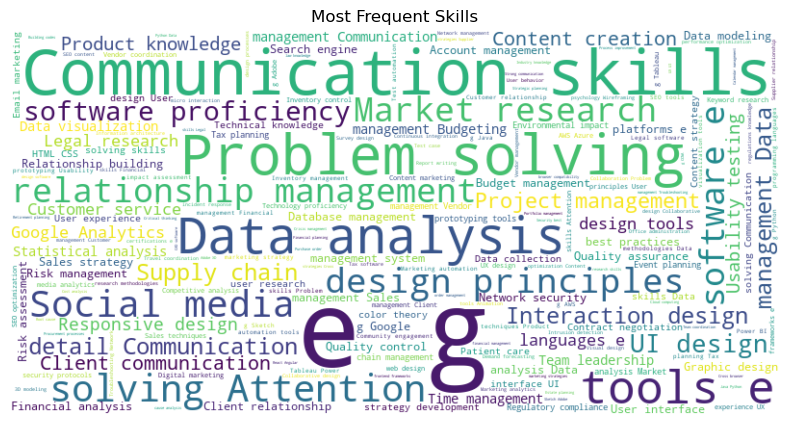

In [88]:
from wordcloud import WordCloud

text = " ".join(str(skill) for skill in df['skills'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Skills')
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Combine relevant text columns — use correct column names
df['combined_text'] = df['skills'].fillna('') + " " + df['Job Description'].fillna('')

# Vectorize combined text
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df['combined_text'])

# Encode target (Role) — we’ll predict job Role
le = LabelEncoder()
y = le.fit_transform(df['Role'])

print(f"TF-IDF shape: {X_text.shape}, Target shape: {y.shape}")

NameError: name 'df' is not defined

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

NameError: name 'X_text' is not defined

In [10]:
import joblib

# Save model and vectorizer
joblib.dump(lr_model, 'logistic_model3.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer3.pkl')
joblib.dump(le, 'label_encoder3.pkl')

NameError: name 'lr_model' is not defined

In [3]:
def predict_role(new_text):
    loaded_model = joblib.load('logistic_model.pkl')
    loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
    loaded_encoder = joblib.load('label_encoder.pkl')

    X_new = loaded_vectorizer.transform([new_text])
    pred = loaded_model.predict(X_new)
    return loaded_encoder.inverse_transform(pred)[0]

# Example
sample_text = "machine learning python data visualization bigquery"
print("Predicted Role:", predict_role(sample_text))

Predicted Role: Machine Learning Engineer
